In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from torchvision.utils import make_grid
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline

C:\Users\LENOVO\anaconda3\envs\pytorchenv\Lib\site-packages\torchvision\io\image.py:13: UserWarning: Failed to load image Python extension: '[WinError 127] The specified procedure could not be found'If you don't plan on using image functionality from `torchvision.io`, you can ignore this warning. Otherwise, there might be something wrong with your environment. Did you have `libjpeg` or `libpng` installed before building `torchvision` from source?
  warn(


In [2]:
transform = transforms.ToTensor()

In [3]:
train_data = datasets.MNIST(root='../Data',train=True,download=True,transform=transform)

In [4]:
test_data = datasets.MNIST(root='../Data',train=False,download=True,transform=transform)

In [5]:
train_data

Dataset MNIST
    Number of datapoints: 60000
    Root location: ../Data
    Split: Train
    StandardTransform
Transform: ToTensor()

In [6]:
train_loader = DataLoader(train_data,batch_size=10,shuffle=True)
test_loader = DataLoader(test_data,batch_size=10,shuffle=False)

In [7]:
# 1color channel, 6 filters , 3x3 kernel or filter,stride =1
conv1 = nn.Conv2d(1,6,3,1)#---> 6 filters --> pooling ---> conv2

#6 input filters conv1, 16 filters, 3x3, stride =1
conv2 = nn.Conv2d(6,16,3,1)

In [8]:
for i , (X_train, y_train) in enumerate(train_data):
    break

In [25]:
x=X_train.view(1,1,28,28) # ---> 4D batch (batch of 1 image)


In [26]:
x=F.relu(conv1(x))

In [27]:
x.shape


torch.Size([1, 6, 26, 26])

In [28]:
x = F.max_pool2d(x,2,2)

In [29]:
x.shape

torch.Size([1, 6, 13, 13])

In [30]:
x=F.relu(conv2(x))

In [31]:
x.shape


torch.Size([1, 16, 11, 11])

In [32]:
x = F.max_pool2d(x,2,2)

In [33]:
x.shape

torch.Size([1, 16, 5, 5])

In [34]:
class ConvolutionalNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(1, 6, 3, 1)
        self.conv2 = nn.Conv2d(6, 16, 3, 1)
        self.fc1 = nn.Linear(5*5*16, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, X):
        X = F.relu(self.conv1(X))
        
        X = F.max_pool2d(X, 2, 2)
        
        X = F.relu(self.conv2(X))
        
        X = F.max_pool2d(X, 2, 2)
       
        X = X.view(-1, 16*5*5)
        
        X = F.relu(self.fc1(X))
        X = F.relu(self.fc2(X))
        X = self.fc3(X)
        return F.log_softmax(X, dim=1)


In [35]:
torch.manual_seed(42)
model = ConvolutionalNetwork()
model

ConvolutionalNetwork(
  (conv1): Conv2d(1, 6, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

In [36]:
for param in model.parameters():#decreases parameter than ann
    print(param.numel())

54
6
864
16
48000
120
10080
84
840
10


In [37]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(),lr=0.001)

In [38]:
import time
start_time = time.time()


# Variables (trackers)
epochs = 5
train_losses = []
test_losses = []
train_correct=[]
test_correct=[]
#for loop epochs
for i in range(epochs):
    trn_corr = 0
    tst_corr = 0

    #train
    for b,(X_train,y_train) in enumerate(train_loader):
        b+=1

        y_pred = model(X_train) #not flatten
        loss = criterion(y_pred,y_train)

        predicted = torch.max(y_pred.data,1)[1]
        batch_corr = (predicted == y_train).sum()
        trn_corr += batch_corr

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if b%600 == 0:
            print(f"epoch: {i} Batch: {b} Loss: {loss.item()}")

    train_losses.append(loss)
    train_correct.append(trn_corr)

    #test
    with torch.no_grad():
        for b,(X_test,y_test) in  enumerate(test_loader):

            y_val = model(X_test)

            predicted = torch.max(y_val.data,1)[1]
            tst_corr +=(predicted == y_test).sum()

    loss = criterion(y_val,y_test)
    test_losses.append(loss)
    test_correct.append(tst_corr)



current_time = time.time()
total = current_time - start_time
print(f"Training took {total/60} minutes")

epoch: 0 Batch: 600 Loss: 0.04255066066980362
epoch: 0 Batch: 1200 Loss: 0.07941801846027374
epoch: 0 Batch: 1800 Loss: 0.31659626960754395
epoch: 0 Batch: 2400 Loss: 0.017571639269590378
epoch: 0 Batch: 3000 Loss: 0.006613238714635372
epoch: 0 Batch: 3600 Loss: 0.0016816823044791818
epoch: 0 Batch: 4200 Loss: 0.48925501108169556
epoch: 0 Batch: 4800 Loss: 0.0214416291564703
epoch: 0 Batch: 5400 Loss: 0.010425271466374397
epoch: 0 Batch: 6000 Loss: 0.0398324616253376
epoch: 1 Batch: 600 Loss: 0.01737210527062416
epoch: 1 Batch: 1200 Loss: 0.03825012594461441
epoch: 1 Batch: 1800 Loss: 0.0018682980444282293
epoch: 1 Batch: 2400 Loss: 0.06100042909383774
epoch: 1 Batch: 3000 Loss: 0.3078094720840454
epoch: 1 Batch: 3600 Loss: 0.0002655660209711641
epoch: 1 Batch: 4200 Loss: 0.002153786364942789
epoch: 1 Batch: 4800 Loss: 0.0013346851337701082
epoch: 1 Batch: 5400 Loss: 0.001729219569824636
epoch: 1 Batch: 6000 Loss: 0.003074359381571412
epoch: 2 Batch: 600 Loss: 0.0022780054714530706
epo

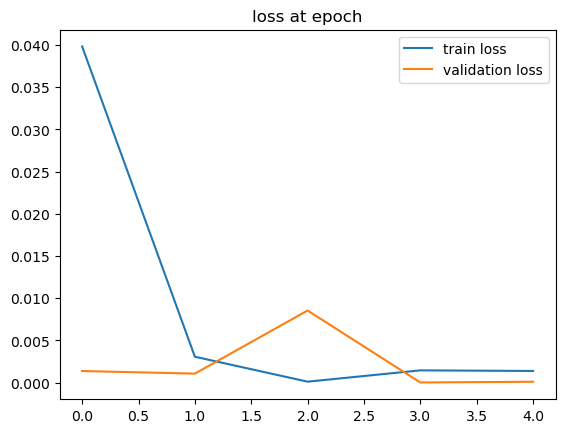

In [40]:
train_losses = [loss.detach().numpy() for loss in train_losses]
test_losses = [loss.detach().numpy() for loss in test_losses]
plt.plot(train_losses, label = 'train loss')
plt.plot(test_losses,label = 'validation loss')
plt.title('loss at epoch')
plt.legend()

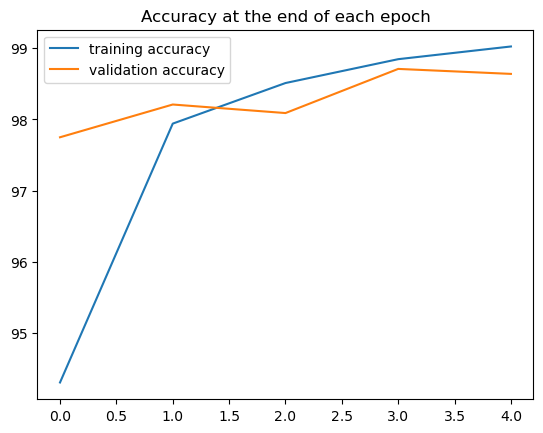

In [41]:
plt.plot([t/600 for t in train_correct], label='training accuracy')
plt.plot([t/100 for t in test_correct], label='validation accuracy')
plt.title('Accuracy at the end of each epoch')
plt.legend()
plt.show()

In [42]:
test_load_all = DataLoader(test_data,batch_size=10000,shuffle=False)

In [43]:
with torch.no_grad():
    correct = 0
    for X_test,y_test in test_load_all:
        y_val = model(X_test)
        predicted = torch.max(y_val,1)[1]
        correct += (predicted == y_test).sum()

In [45]:
correct.item()/len(test_data)

0.9864

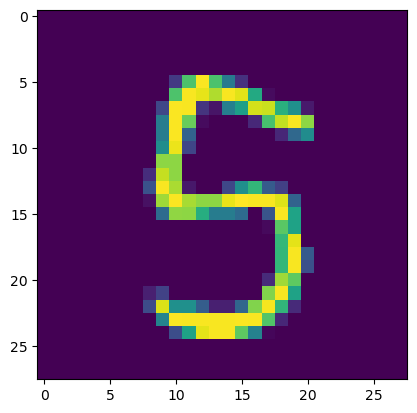

In [62]:
plt.imshow(test_data[5726][0].reshape(28,28))

In [63]:
model.eval()
with torch.no_grad():
    new_prediction = model(test_data[5726][0].view(1,1,28,28))

In [64]:
new_prediction.argmax()

tensor(5)